---
---

# CHALLENGE 1: Alura Store Latam


* Autor: Cristián Abellá F.

---
---

## 0. Importación librerías

---

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import unicodedata
import re



##  1. Análisis de Facturación.

---

Estructura de datos:

El conjunto de datos incluye la siguiente información:

* Producto y Categoría: Artículos vendidos y sus calificaciones.

* Precio y Envío: Valores de venta y costos asociados.

* Fecha y ubicación de compra: Información temporal y geográfica.

* Evaluación de compra: Comentarios de clientes.

* Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

* Coordenadas Geográficas: Ubicación de las transacciones.


## 1.1 Importación de datos

---

In [36]:
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

In [37]:
tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

## 1.2 Exploración de datos

---

* Limpieza

In [38]:
def normalize_col(c):
    c = "".join(ch for ch in unicodedata.normalize("NFKD", c) if not unicodedata.combining(ch))
    c = re.sub(r"\s+", " ", c).strip()
    return c

In [39]:
def clean_df(df):
    df = df.copy()
    df.columns = [normalize_col(c) for c in df.columns]
    rename_map = {
        "Categoria del Producto": "Categoria del Producto",
        "Categoría del Producto": "Categoria del Producto",
        "Costo de envio": "Costo de envio",
        "Costo de envío": "Costo de envio",
    }
    df.columns = [rename_map.get(c, c) for c in df.columns]
    for col in ["Precio", "Costo de envio", "Calificacion", "Calificación"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")
    if "Calificacion" not in df.columns and "Calificación" in df.columns:
        df = df.rename(columns={"Calificación":"Calificacion"})
    return df

In [42]:
tienda  = clean_df(tienda)
tienda2 = clean_df(tienda2)
tienda3 = clean_df(tienda3)
tienda4 = clean_df(tienda4)


* Verificación de columnas, que coincidan en todos los dataframe para poder concatenar

In [43]:
cols1, cols2, cols3, cols4 = [list(df.columns) for df in (tienda, tienda2, tienda3, tienda4)]
assert cols1 == cols2 == cols3 == cols4, "Las columnas no coinciden entre tiendas."

* Agregar identificador de tienda

In [44]:

tienda["Tienda"]  = 1
tienda2["Tienda"] = 2
tienda3["Tienda"] = 3
tienda4["Tienda"] = 4

* Concatenar

In [45]:
TIENDAS = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

* Histograma de Precio por tienda

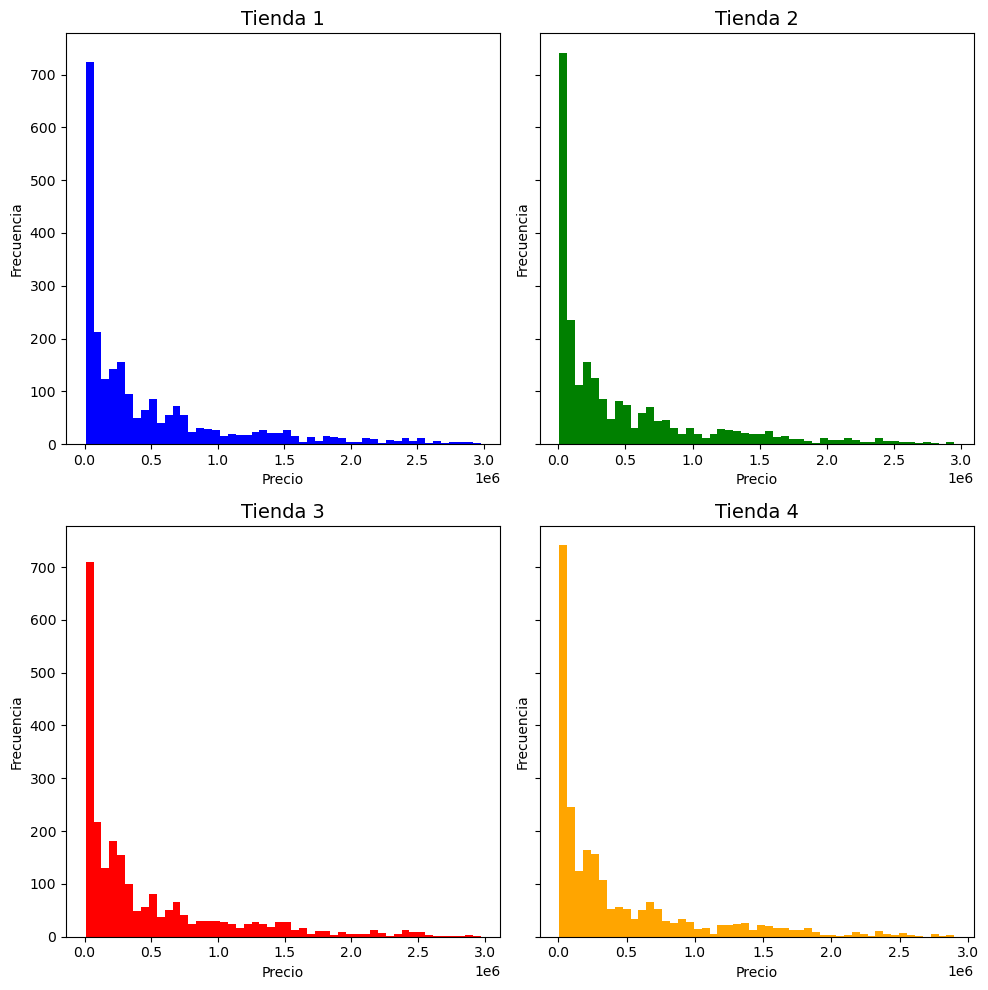

In [46]:

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(10,10))
n_bins = 50
for ax, t, color in zip(axs.ravel(), [1,2,3,4], ["blue","green","red","orange"]):
    dist = TIENDAS.loc[TIENDAS["Tienda"]==t, "Precio"].dropna()
    ax.hist(dist, bins=n_bins, color=color)
    ax.set_title(f"Tienda {t}", fontsize=14)
    ax.set_xlabel("Precio"); ax.set_ylabel("Frecuencia")
plt.show()

##  2. Análisis de facturación (Ingresos y métricas por tienda)

---

In [47]:
res_facturacion = (
    TIENDAS
    .groupby("Tienda")
    .agg(
        ingresos_totales = ("Precio","sum"),
        media_precio     = ("Precio","mean"),
        std_precio       = ("Precio","std"),
        media_envio      = ("Costo de envio","mean")
    )
    .round(3)
    .reset_index()
)
print("REPORTE INGRESOS\n", res_facturacion)


REPORTE INGRESOS
    Tienda  ingresos_totales  media_precio  std_precio  media_envio
0       1      1.150880e+09    487867.910  614686.765    26018.610
1       2      1.116344e+09    473227.427  595559.550    25216.236
2       3      1.098020e+09    465459.771  580643.391    24805.680
3       4      1.038376e+09    440362.892  568755.604    23459.457


* Gráfico de distribución de Calificación por tienda

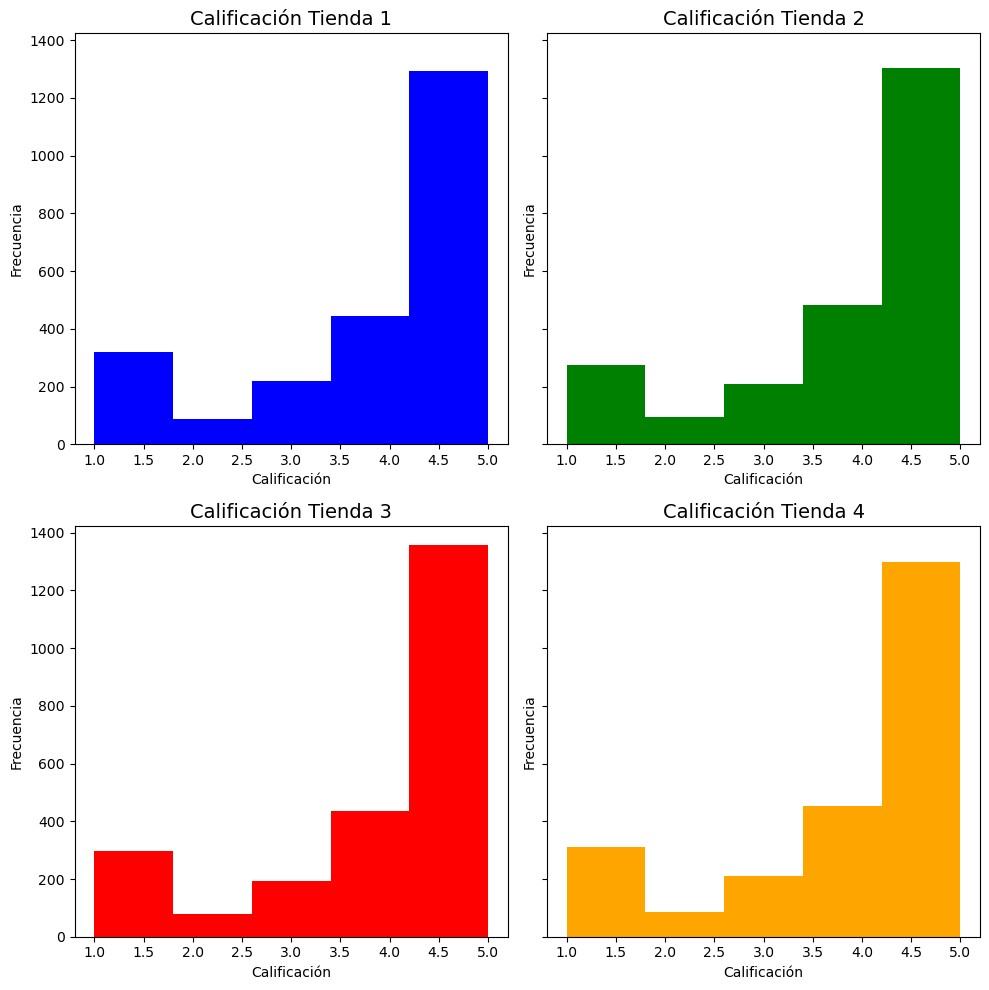

In [48]:

fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True, figsize=(10,10))
n_bins = 5
for ax, t, color in zip(axs.ravel(), [1,2,3,4], ["blue","green","red","orange"]):
    dist = TIENDAS.loc[TIENDAS["Tienda"]==t, "Calificacion"].dropna()
    ax.hist(dist, bins=n_bins, color=color)
    ax.set_title(f"Calificación Tienda {t}", fontsize=14)
    ax.set_xlabel("Calificación"); ax.set_ylabel("Frecuencia")
plt.show()

* Pie de ingresos por tienda

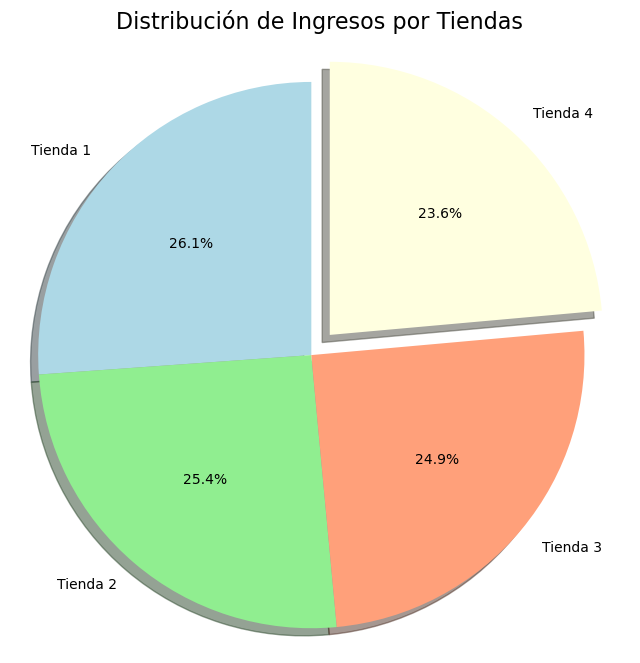

In [49]:

categorias = [f"Tienda {t}" for t in [1,2,3,4]]
valores = res_facturacion.set_index("Tienda").loc[[1,2,3,4], "ingresos_totales"].tolist()
colores = ['lightblue','lightgreen','lightsalmon','lightyellow']
explode = (0, 0, 0, 0.1)
plt.figure(figsize=(8, 8))
plt.pie(valores, explode=explode, labels=categorias, colors=colores, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Distribución de Ingresos por Tiendas', fontsize=16)
plt.axis('equal')
plt.show()

##  3. Ventas por categoría

---

In [50]:
ventas_categoria = (
    TIENDAS
    .groupby(["Tienda","Categoria del Producto"])
    .size()
    .rename("ventas")
    .reset_index()
    .sort_values(["Tienda","ventas"], ascending=[True, False])
)
print("\nVENTAS POR CATEGORÍA (Top por tienda):")
top_cat = ventas_categoria.groupby("Tienda").head(1)
print(top_cat)


VENTAS POR CATEGORÍA (Top por tienda):
    Tienda Categoria del Producto  ventas
7        1                Muebles     465
15       2                Muebles     442
23       3                Muebles     499
31       4                Muebles     480


##  4. Calificación promedio de la tienda

---

In [51]:
calif_prom = (
    TIENDAS
    .groupby("Tienda")["Calificacion"]
    .mean()
    .round(3)
    .reset_index(name="calificacion_promedio")
)
print("\nCALIFICACIÓN PROMEDIO POR TIENDA:\n", calif_prom)


CALIFICACIÓN PROMEDIO POR TIENDA:
    Tienda  calificacion_promedio
0       1                  3.977
1       2                  4.037
2       3                  4.048
3       4                  3.996


##  5. Productos más y menos vendidos

---

In [52]:
def top_bottom_productos(df, tienda_id, k=1):
    sub = df[df["Tienda"]==tienda_id]
    conteo = sub["Producto"].value_counts(dropna=False)
    top = conteo.head(k)
    bottom = conteo.tail(k)
    return top, bottom



In [53]:
print("\nPRODUCTOS MÁS y MENOS VENDIDOS (por tienda):")
for t in [1,2,3,4]:
    top, bottom = top_bottom_productos(TIENDAS, t, k=1)
    print(f"\nTienda {t}")
    print("Más vendido:\n", top)
    print("Menos vendido:\n", bottom)


PRODUCTOS MÁS y MENOS VENDIDOS (por tienda):

Tienda 1
Más vendido:
 Producto
TV LED UHD 4K    60
Name: count, dtype: int64
Menos vendido:
 Producto
Celular ABXY    33
Name: count, dtype: int64

Tienda 2
Más vendido:
 Producto
Iniciando en programación    65
Name: count, dtype: int64
Menos vendido:
 Producto
Juego de mesa    32
Name: count, dtype: int64

Tienda 3
Más vendido:
 Producto
Kit de bancas    57
Name: count, dtype: int64
Menos vendido:
 Producto
Bloques de construcción    35
Name: count, dtype: int64

Tienda 4
Más vendido:
 Producto
Cama box    62
Name: count, dtype: int64
Menos vendido:
 Producto
Guitarra eléctrica    33
Name: count, dtype: int64


##  6. Envío promedio por tienda

---

In [54]:
envio_prom = (
    TIENDAS
    .groupby("Tienda")["Costo de envio"]
    .mean()
    .round(3)
    .reset_index(name="costo_envio_promedio")
)



ENVÍO PROMEDIO POR TIENDA:
    Tienda  costo_envio_promedio
0       1             26018.610
1       2             25216.236
2       3             24805.680
3       4             23459.457


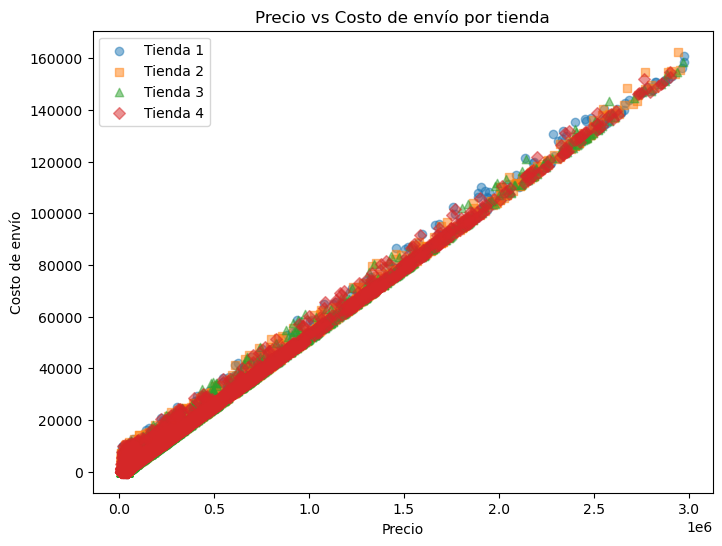

In [55]:
print("\nENVÍO PROMEDIO POR TIENDA:\n", envio_prom)

plt.figure(figsize=(8,6))
for t, marker in zip([1,2,3,4], ["o","s","^","D"]):
    sub = TIENDAS[TIENDAS["Tienda"]==t]
    plt.scatter(sub["Precio"], sub["Costo de envio"], label=f"Tienda {t}", alpha=0.5, marker=marker)
plt.xlabel("Precio"); plt.ylabel("Costo de envío"); plt.title("Precio vs Costo de envío por tienda")
plt.legend()
plt.show()

## 7. INFORME

---

# Análisis de Facturación y Ventas por Tiendas

## 1. Análisis General de Ingresos
- **Tienda 1** generó los mayores ingresos totales con **1.15 mil millones**, seguida de la Tienda 2 (1.12 mil millones), Tienda 3 (1.09 mil millones) y Tienda 4 (1.04 mil millones).
- La distribución en el gráfico circular muestra que las cuatro tiendas aportan de forma bastante equilibrada, pero **Tienda 1 concentra la mayor proporción (26.1%)** y Tienda 4 la menor (23.6%).
- En todas las tiendas se observa una **alta dispersión de precios** (desviaciones estándar > 560 mil), lo cual sugiere que los catálogos incluyen tanto productos económicos como artículos de alto valor.

**Insight de negocio:**  
El liderazgo de Tienda 1 en ingresos debe analizarse en relación a su **mix de productos y categorías premium**. Podría ser estratégico replicar su oferta o estructura de precios en las demás tiendas.

---

## 2. Ventas por Categoría
- En todas las tiendas, la **categoría más vendida es Muebles**, superando las 440 unidades en cada tienda.
- Esto muestra una clara **preferencia del cliente por productos de mobiliario**, independientemente de la ubicación de la tienda.

**Insight de negocio:**  
El negocio debería considerar:
- Expandir el portafolio de muebles (nuevos diseños, promociones, envíos gratuitos).
- Crear campañas de **cross-selling** vinculando muebles con categorías menos vendidas para aumentar rotación del inventario.

---

## 3. Calificación Promedio
- Las calificaciones promedian entre **3.97 y 4.05**, con ligeras variaciones:
  - Tienda 3 lidera en satisfacción (**4.048**).
  - Tienda 2 también presenta un buen desempeño (**4.037**).
  - Tiendas 1 y 4 quedan levemente por debajo (**~3.98–4.00**).

**Insight de negocio:**  
El nivel de satisfacción es bueno en general, pero se recomienda:
- Revisar **procesos logísticos y de atención en Tienda 1 y 4** para elevar la experiencia de cliente.
- Explorar programas de fidelización en Tienda 3, donde ya existe una mejor percepción.

---

## 4. Productos Más y Menos Vendidos
- **Más vendidos por tienda:**
  - Tienda 1 → *TV LED UHD 4K* (60 ventas).  
  - Tienda 2 → *Libro "Iniciando en programación"* (65 ventas).  
  - Tienda 3 → *Kit de bancas* (57 ventas).  
  - Tienda 4 → *Cama box* (62 ventas).  

- **Menos vendidos por tienda:**
  - Tienda 1 → *Celular ABXY* (33 ventas).  
  - Tienda 2 → *Juego de mesa* (32 ventas).  
  - Tienda 3 → *Bloques de construcción* (35 ventas).  
  - Tienda 4 → *Guitarra eléctrica* (33 ventas).  

**Insight de negocio:**  
- Los **top sellers son productos ancla** y deberían recibir campañas de marketing específicas (combos, publicidad destacada).  
- Los **menos vendidos necesitan análisis**: ¿son productos de nicho, problemas de precio, baja visibilidad? Se podría:
  - Reajustar precios o promociones.
  - Rotar inventario hacia tiendas con mayor demanda potencial.
  - Reducir stock para evitar costos de almacenaje.

---

## 5. Envío Promedio por Tienda
- Existe una **correlación casi perfecta entre precio y costo de envío** (scatter plot lo confirma, prácticamente lineal).
- El costo promedio por tienda va desde **$23,459 (Tienda 4)** hasta **$26,019 (Tienda 1)**.
- Tienda 4 tiene los envíos más baratos, lo que podría ser un **atractivo competitivo** frente a las demás.

**Insight de negocio:**  
- El modelo de envíos podría ser revisado: ¿es proporcional al precio? Esto puede desincentivar compras de productos más costosos.  
- Estrategia sugerida: implementar **envíos gratuitos a partir de cierto monto de compra** para suavizar la relación precio–envío y estimular ticket promedio más alto.

---

# Conclusiones Estratégicas

1. **Ingresos equilibrados entre tiendas, con ligero liderazgo de Tienda 1.** Replicar prácticas de catálogo y gestión de esta tienda en las demás.  
2. **Categoría Muebles es el motor de ventas.** Potenciarla con marketing cruzado y mayor variedad de productos.  
3. **Satisfacción alta, pero Tiendas 1 y 4 necesitan mejoras.** Probablemente en atención y logística.  
4. **Productos menos vendidos requieren diagnóstico.** Se recomienda ajustar precios o campañas, y reducir inventario si no muestran potencial.  
5. **Costo de envío altamente correlacionado al precio.** Oportunidad de rediseñar estrategia logística para mejorar competitividad y aumentar ventas de productos de alto valor.
